# Convolutional Neural Network (CNN)


Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in `image recognition` and `processing`. When discussing CNNs, several key terms and concepts come into play:

 - **Convolutional Layer:** This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.
    - **Convolutional Operation:** This operation involves a `kernel` (or `filter`) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently `focused` on. The result is a single value in the output feature map.


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

ImportError: Traceback (most recent call last):
  File "c:\Users\MERA NAAM HAI BHULLA\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

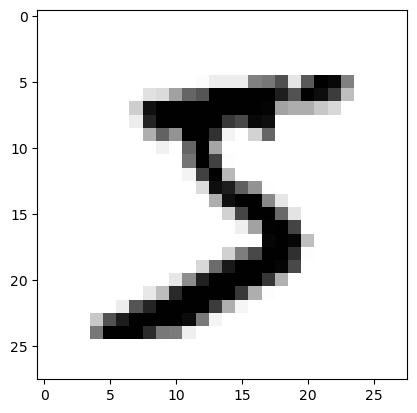

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.binary)

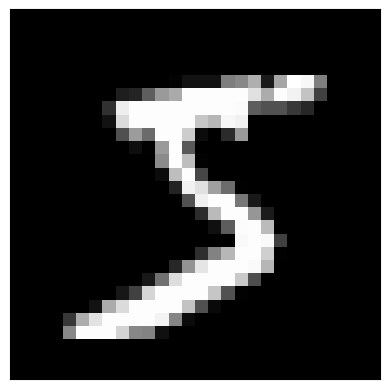

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [ ]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [ ]:
# also need to change the data type to float32 Data Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 

<Figure size 640x480 with 0 Axes>

<Axes: >

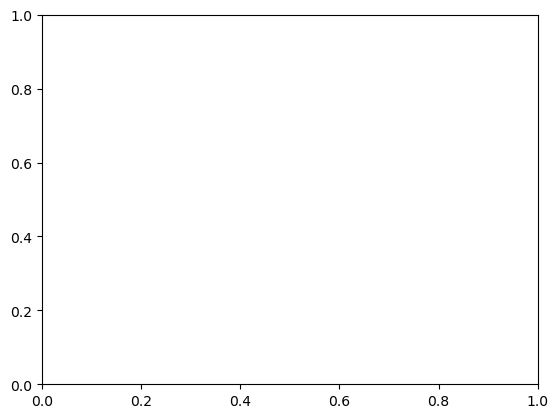

In [ ]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()
    
# Reshape the images to have a channel dimension
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

# Build the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                 

In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 14s 14ms/step - loss: 0.3733 - accuracy: 0.8862 - val_loss: 0.1401 - val_accuracy: 0.9617
Epoch 2/5
750/750 [==============================] - 10s 13ms/step - loss: 0.1241 - accuracy: 0.9628 - val_loss: 0.1159 - val_accuracy: 0.9652
Epoch 3/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0936 - accuracy: 0.9716 - val_loss: 0.0889 - val_accuracy: 0.9744
Epoch 4/5
750/750 [==============================] - 10s 14ms/step - loss: 0.0786 - accuracy: 0.9758 - val_loss: 0.0790 - val_accuracy: 0.9755
Epoch 5/5
750/750 [==============================] - 10s 14ms/step - loss: 0.0696 - accuracy: 0.9784 - val_loss: 0.0765 - val_accuracy: 0.9777


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0607 - accuracy: 0.9809
Test Loss: 0.06071845069527626
Test Accuracy: 0.98089998960495


In [ ]:
# Save the model to be used later
model.save('models_saved/model.h5')

/Users/babaaammar/mambaforge/envs/tf_env/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Assignment:** Take 10 Sticky notes and write with big board marker 0-9 digits, make their pictures, convert them into 28x28 in gray scale, and then use the trained model to predict the digits.

In [ ]:
# grab an image
img = X_test[0]
print(img.shape)

# rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)

(28, 28)
(28, 28, 1)


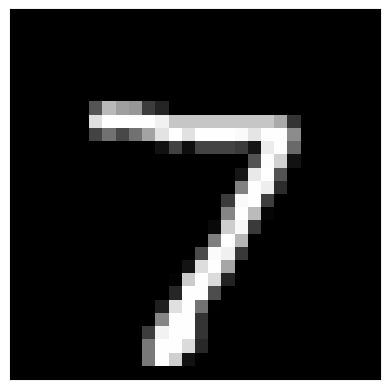

In [ ]:
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [ ]:
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(predictions)

1/1 [==============================] - 1s 661ms/step
[[5.5759571e-08 4.8354224e-07 2.0294122e-07 5.1446127e-06 3.1355352e-11
  3.0328025e-09 1.9057860e-14 9.9999094e-01 8.0842968e-09 3.2474902e-06]]


In [ ]:
print(predictions[:,7])

[0.99999094]


In [ ]:
print(f"The model predicts that this image is a {predictions.argmax()}.")

The model predicts that this image is a 7.


# **Assignment:** Write a function to name the labels of predicted images!